In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from pandas import read_csv
sns.set_style('white')
sns.set_context('notebook', font_scale=1.25)
%matplotlib inline

In [4]:
## Load data.
data = read_csv('../01_Priors/data.csv').query('Study=="2017mkrtchian"')

## Update cue.
data.Cue = data.Cue.replace({1:'GW',2:'GAL',3:'NGW',4:'NGAL'})

## Filter out bad participants.
gb = data.query('Cue=="GW"').groupby('Subject').Accuracy.mean()
data = data[np.in1d(data.Subject, gb[gb > 0.55].index)]

## Compute accuracy.
gb = data.groupby(['Diagnosis','Subject','Cue']).Accuracy.mean().reset_index()

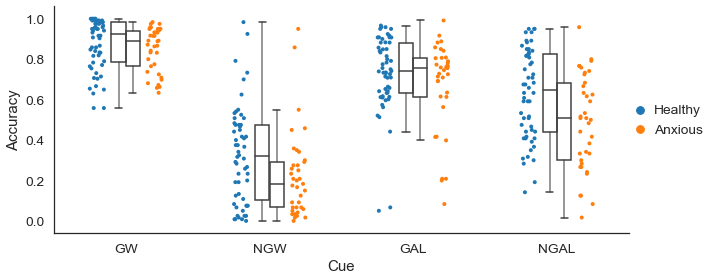

In [5]:

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(10,4))
order = ['GW','NGW','GAL','NGAL']
hue_order = ['Healthy','Anxious']

## Plotting
ax = sns.boxplot('Cue', 'Accuracy', 'Diagnosis', data=gb, order=order, hue_order=hue_order, dodge=0.1,
                 showfliers=False, width=.2, boxprops={'facecolor':'none', "zorder":-1}, 
                 whiskerprops={'linewidth':1.5, "zorder":-1,'alpha':0.7})
ax = sns.stripplot('Cue', 'Accuracy', 'Diagnosis', data=gb, order=order, hue_order=hue_order, dodge=0.5, size=4)

## Add legend.
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:], labels[2:], loc=7, bbox_to_anchor=(1.15,0.5), frameon=False, 
          handletextpad=0, columnspacing=1)

sns.despine()
plt.tight_layout()

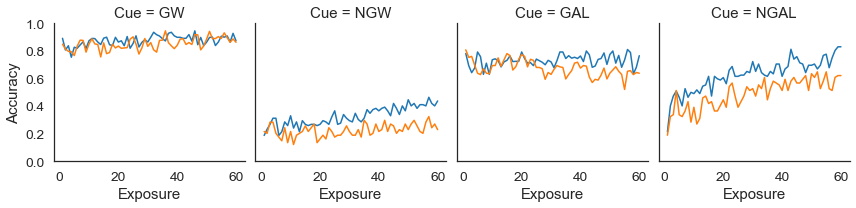

In [23]:
g = sns.FacetGrid(data, col='Cue', col_order=order)
g.map(sns.lineplot, 'Exposure', 'Accuracy', 'Diagnosis', ci=None)
g.set(ylim=(0,1))

v0 = 0
v0 = -1


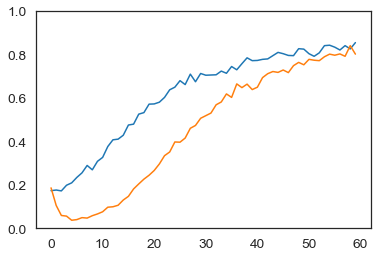

In [155]:
np.random.seed(47404)

## Define parameters.
beta = 5
eta = 0.2
go = 0.3
pi = 1

for v0 in [0, -1]:

    Q = np.zeros((1000,2))
    V = np.zeros(1000) + v0

    inv_logit = lambda x: 1. / (1 + np.exp(-x))

    x = np.zeros((1000,60)).astype(int)
    print('v0 = %s' %v0)
    for i in range(60):

        theta = inv_logit( beta * (Q[:,1] - Q[:,0] + go + pi * np.mean(Q, axis=1)) )
        x[:,i] = np.random.binomial(1,theta)

        r = np.random.binomial(1, np.where(x[:,i], 0.2, 0.8) ) - V

        Q[np.arange(1000),x[:,i]] += eta * (r - Q[np.arange(1000),x[:,i]])
#         print(Q.mean(axis=0).round(3), x[:,i].mean(axis=0))
        V += eta * r

    plt.plot(1 - x.mean(axis=0))
    plt.ylim(0,1)

In [160]:
data['zRT'] = np.log(data['RT'])
data['zRT'] = data.groupby(['Subject','Condition']).zRT.apply(lambda x: (x-x.mean())/x.std())

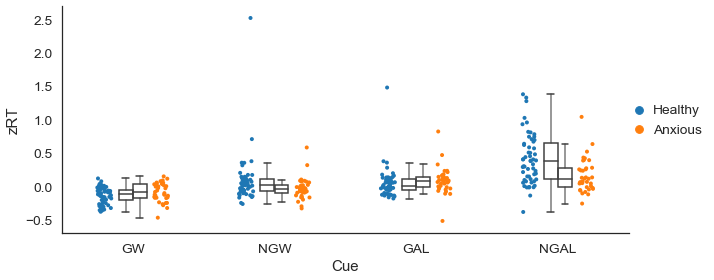

In [162]:
## Compute accuracy.
gb = data.groupby(['Diagnosis','Subject','Cue']).zRT.mean().reset_index()

## Initialize canvas.
fig, ax = plt.subplots(1,1,figsize=(10,4))
order = ['GW','NGW','GAL','NGAL']
hue_order = ['Healthy','Anxious']

## Plotting
ax = sns.boxplot('Cue', 'zRT', 'Diagnosis', data=gb, order=order, hue_order=hue_order, dodge=0.1,
                 showfliers=False, width=.2, boxprops={'facecolor':'none', "zorder":-1}, 
                 whiskerprops={'linewidth':1.5, "zorder":-1,'alpha':0.7})
ax = sns.stripplot('Cue', 'zRT', 'Diagnosis', data=gb, order=order, hue_order=hue_order, dodge=0.5, size=4)

## Add legend.
handles, labels = ax.get_legend_handles_labels()
ax.legend(handles[2:], labels[2:], loc=7, bbox_to_anchor=(1.15,0.5), frameon=False, 
          handletextpad=0, columnspacing=1)

sns.despine()
plt.tight_layout()